In [1]:
import numpy as np # linear algebra
import pandas as pd

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/car-price-prediction/CarPrice_Assignment.csv
/kaggle/input/car-price-prediction/Data Dictionary - carprices.xlsx


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [3]:
df=pd.read_csv('/kaggle/input/car-price-prediction/CarPrice_Assignment.csv')

In [4]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [6]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [7]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [8]:
pd.DataFrame(df.dtypes, columns=['Datatype'])

,Datatype
car_ID,int64
symboling,int64
CarName,object
fueltype,object
aspiration,object
doornumber,object
carbody,object
drivewheel,object
enginelocation,object
wheelbase,float64


In [9]:
df.nunique()

car_ID              205
symboling             6
CarName             147
fueltype              2
aspiration            2
doornumber            2
carbody               5
drivewheel            3
enginelocation        2
wheelbase            53
carlength            75
carwidth             44
carheight            49
curbweight          171
enginetype            7
cylindernumber        7
enginesize           44
fuelsystem            8
boreratio            38
stroke               37
compressionratio     32
horsepower           59
peakrpm              23
citympg              29
highwaympg           30
price               189
dtype: int64

In [10]:
df.carbody.value_counts()

carbody
sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: count, dtype: int64

In [11]:
df.CarName.value_counts()

CarName
toyota corona           6
toyota corolla          6
peugeot 504             6
subaru dl               4
mitsubishi mirage g4    3
                       ..
mazda glc 4             1
mazda rx2 coupe         1
maxda glc deluxe        1
maxda rx3               1
volvo 246               1
Name: count, Length: 147, dtype: int64

In [12]:
df['company'] = df['CarName'].apply(lambda x: x.split(' ')[0])

In [13]:
df.company.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [14]:
pd.DataFrame(df['company'].value_counts() )

,count
company,
toyota,31
nissan,17
mazda,15
honda,13
mitsubishi,13
subaru,12
peugeot,11
volvo,11
volkswagen,9


In [15]:
pd.DataFrame(df['company'].value_counts() )

,count
company,
toyota,31
nissan,17
mazda,15
honda,13
mitsubishi,13
subaru,12
peugeot,11
volvo,11
volkswagen,9


In [16]:
df.company.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [17]:
df.company.replace('maxda', 'mazda', inplace=True)
df.company.replace('porcshce', 'porsche', inplace=True)
df.company.replace('toyouta', 'toyota', inplace=True)
df.company.replace('vokswagen', 'volkswagen', inplace=True)
df.company.replace('vw', 'volkswagen', inplace=True)
df.company.replace('Nissan', 'nissan', inplace=True)

/tmp/ipykernel_17/2297275561.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.company.replace('maxda', 'mazda', inplace=True)
/tmp/ipykernel_17/2297275561.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

In [18]:
df.company.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

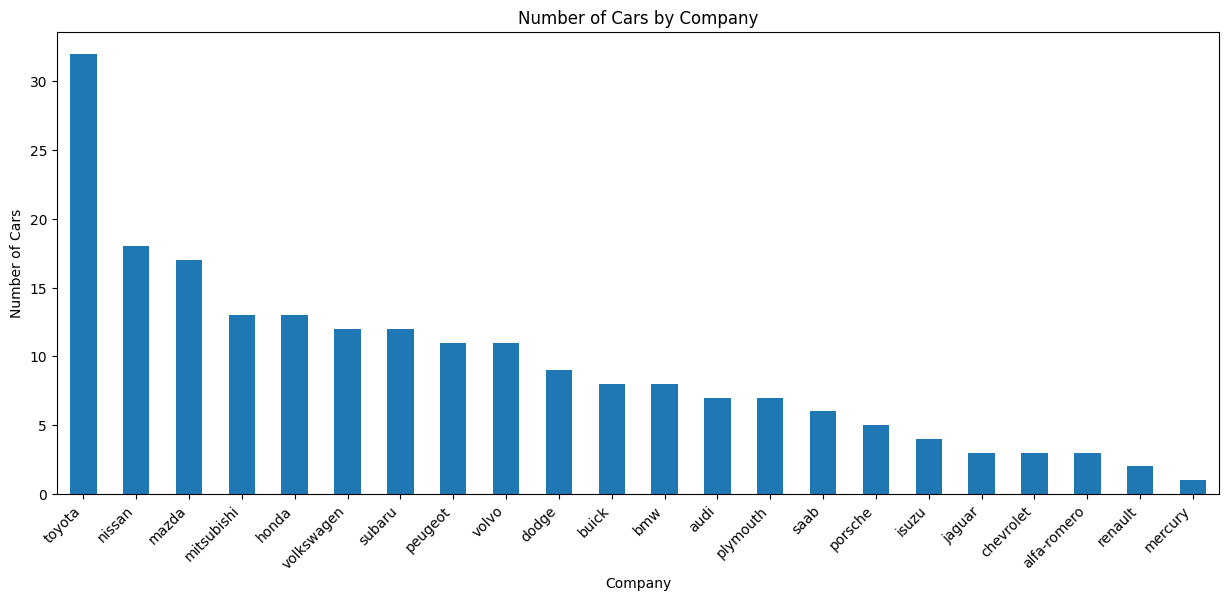

In [19]:
plt.figure(figsize=(15, 6))

# making bar plot of value count of cars by company
df['company'].value_counts().plot(kind='bar')
# adding title and x and y axis labels
plt.title('Number of Cars by Company')
plt.xlabel('Company')
plt.ylabel('Number of Cars')
plt.xticks(rotation=45, ha='right')
plt.show()

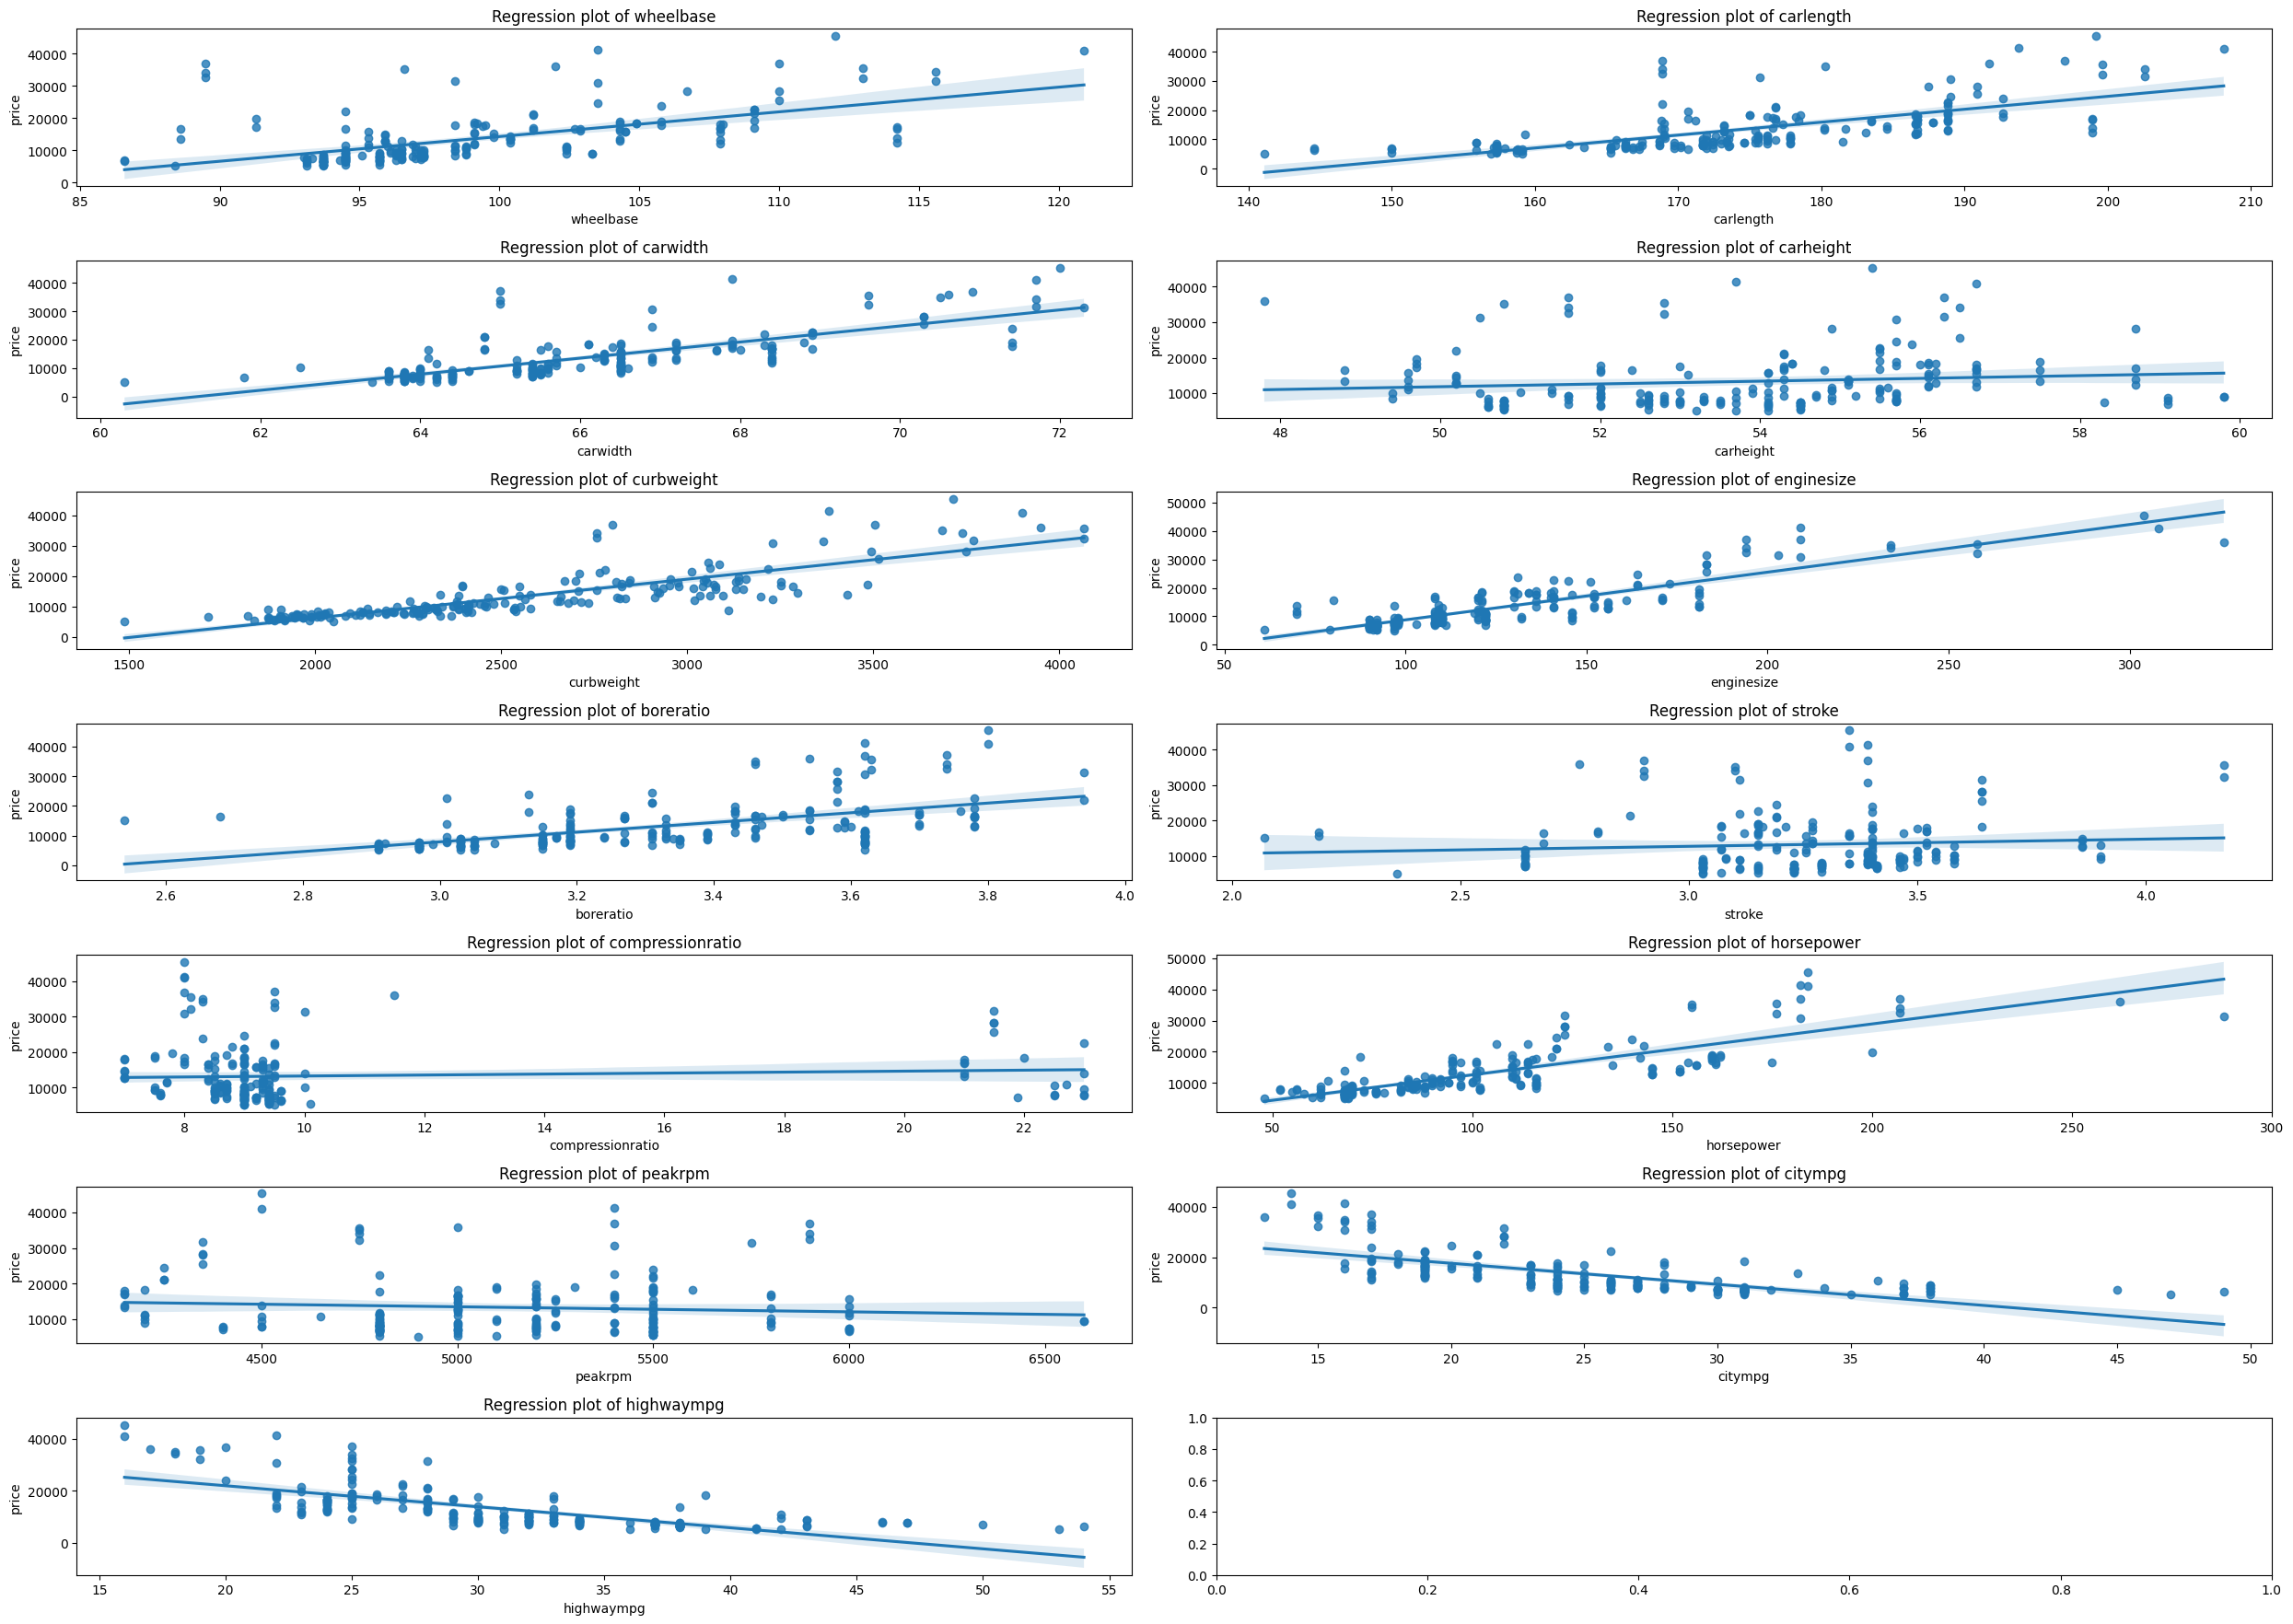

In [20]:
# selecting only the desired numeric columns from dataframe
numeric = df[['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 
'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']]

# plotting the histogram

# define the figure size
plt.figure(figsize=(25, 50))

# for loop to plot the regression plot
for i in range(len(numeric.columns)):
    plt.subplot(20 , 2 , i+1)
    # check if the column is 'price' and skip it
    if numeric.columns[i] == 'price':
        continue
    # plot the regression plot
    sns.regplot(data= numeric , x = numeric.columns[i] , y='price')
    # defining layout
    plt.tight_layout()
    # set the title
    plt.title(f'Regression plot of {numeric.columns[i]}')
plt.show()

In [21]:
df.drop(columns=['car_ID', 'CarName', 'symboling'], inplace=True)
#columns already removed in first run, so second time it is giving error

In [22]:
X = df[['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 
        'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 
        'citympg', 'highwaympg']]  # Independent variables
y = df['price']

In [23]:
# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [25]:
y_pred = lr.predict(X_test)

In [26]:
pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}).head(10)

,Actual,Predicted
15,30760.000,27066.508988
9,17859.167,17331.789257
100,9549.000,10565.440265
132,11850.000,14409.752294
68,28248.000,25363.326675
95,7799.000,6134.043532
159,7788.000,9675.994118
162,9258.000,7051.537882
147,10198.000,11910.015501
182,7775.000,10042.714176


In [27]:
# Evaluating the model
from sklearn.metrics import r2_score, mean_squared_error
print(f'R2 score = {r2_score(y_test, y_pred)}')
print(f"Mean Squared Error = {mean_squared_error(y_test, y_pred)}")

R2 score = 0.8146957315667043
Mean Squared Error = 14628664.03628779


In [28]:
print(f"The root mean squared error = {np.sqrt(mean_squared_error(y_test, y_pred))}")

The root mean squared error = 3824.743656284404
